# Projet numérique 2
***Le but de ce projet est de voir l'intérêt d'un pas variable plutôt qu'un pas fixe dans la résolution numérique d'équation différentielles.***

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### schéma euler explicite ordre 1

In [2]:
def solve_euler_explicit(f,x0,dt):
    x=[x0]
    T=[0]
    t=0
    i=0
    while t <= 10:       
        x.append(x[i]+dt*f(t,x[i]))
        i +=1
        t += dt
        T.append(t)
    return T,x

Nous allons tester ce solveur sur une equation dont nous connaissons la solution

In [3]:
def f(t,x):
    return x

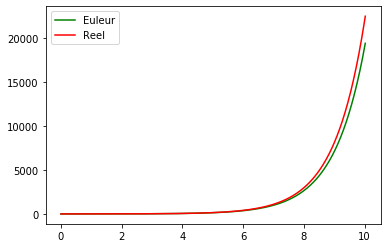

In [4]:
t,x_euler=solve_euler_explicit(f,1,0.03)
x_exp=np.exp(t)
plt.plot(t,x_euler,color='green',label = 'Euleur')
plt.plot(t,x_exp,color='red',label = 'Reel')
plt.legend()

plt.show()

Voyons l'évolution de la précision en fonction de $\Delta t$.\
Nous affichons l'écart entre la valeur en t = 10 de exp  et celle de la solution de euleur.

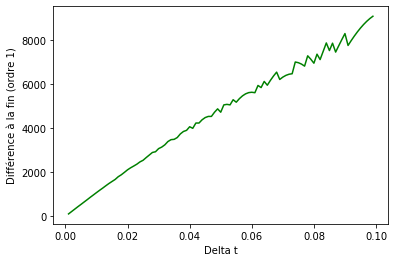

In [5]:
x_diff1=[]
T=[]
step = 100
for i in range (1,step):
    dt = i/(10*step)
    t,x_euler=solve_euler_explicit(f,1,dt)
    x_exp=np.exp(t)
    diff = np.abs(x_euler[-1] - x_exp[-1])
    x_diff1.append(diff)
    T.append(dt)
plt.plot(T,x_diff1,color='green')
plt.xlabel('Delta t')
plt.ylabel('Différence à la fin (ordre 1)')
plt.show()

ça marche pour dt<0.08
l'écart à la réaltité est fonction linéaire de dt.

### schéma ordre 2  : méthode de Heun

In [6]:
def heun_ordre_2 (f,x0,dt):
    x=[x0]
    T=[0]
    t=0
    i=0
    while t <= 10:
        T.append(t+dt)
        x.append(x[i] + 0.5*dt* (f(t,x[i]) + f(t + dt,x[i]+dt*f(t,x[i]))))
        t += dt
        i += 1
    return T,x

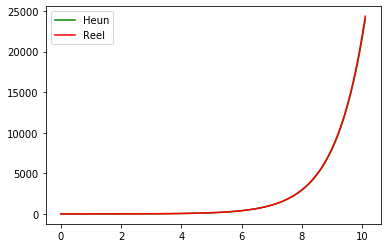

In [7]:
t,x_heun = heun_ordre_2(f,1,0.1)
x_exp = np.exp(t)
plt.plot(t,x_heun,color='green',label = 'Heun')
plt.plot(t,x_exp,color='red',label = 'Reel')
plt.legend()
plt.show()

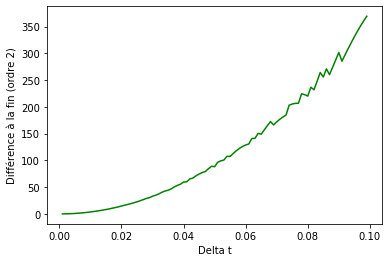

In [8]:
x_diff2=[]
T=[]
step = 100
for i in range (1,step):
    dt = i/(10*step)
    t,x_heun=heun_ordre_2(f,1,dt)
    x_exp=np.exp(t)
    diff = np.abs(x_heun[-1] - x_exp[-1])
    x_diff2.append(diff)
    T.append(dt)
plt.plot(T,x_diff2,color='green')
plt.xlabel('Delta t')
plt.ylabel('Différence à la fin (ordre 2)')
plt.show()

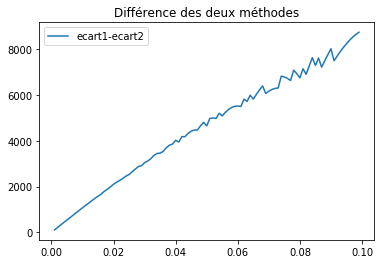

In [9]:
dif = [x_diff1[i]-x_diff2[i] for i in range(len(x_diff1))]
plt.plot(T,dif,label = 'ecart1-ecart2')
plt.title('Différence des deux méthodes')
plt.legend()
plt.show()

## Pas variable :
On s'intéresse à l'implémentation d'un pas variable dans une méthode d'euler explicite.

### Evaluation de l'erreur absolue locale:

On note :  $e^{j+1} = \left(  x^{j} + \int_{t_j}^{t_{j+1}} f(s,x(s)) ds - x^{j+1} \right) $ l'erreur absolue locale.\
On veut montrer que $ \left\| e^{j+1} \right\| =\Delta t_{j}  \frac{\left\|f(t_{j+1}, x^{j+1})-f(t_{j},  x^{j})\right\|}{2}\ + O(\Delta t_{j}^{3}) $ \
Tout d'abord, exprimons l'intégrale. \
Notons $F : t \mapsto f(t,x(t))$ \
On a $F(t_j + \alpha) = F(t_j) + \alpha F'(t_j) + O(\alpha^2)$ (car $f$ est $\mathcal{C}^1$ donc F aussi). En le mettans dans l'intégrale :\
$\int_{t_j}^{t_{j+1}} f(s,x(s)) ds = \Delta t_{j}F(t_j) + \frac{\Delta t_{j}^2}{2}[F'(t_j)] + O(\Delta t_{j}^3)$\
Or en détaillant l'expression de $x^{j+1}$ : $x^{j+1} = x^j + \Delta t_{j}f(t_j,x^{j}) = x^j + \Delta t_{j}F(t_j)$ avec $x(t_j) = x^j$ on obtient :\
$$e^{j+1} = \frac{\Delta t_{j}^2}{2}[F'(t_j)] + O(\Delta t_{j}^3)$$\
et $F'(t_{j}) = \partial_t f(t_j,x^j)+ \dot x(t_j) \partial_x f(t_j,x^j) = \partial_t f(t_j,x^j)+ F(t_j) \partial_x f(t_j,x^j)$\
On reconnait : $ f(t_{j+1},x^{j+1}) = f(t_j + \Delta t_{j},x^j + \Delta t_{j} F(t_j)) =$ $ f(t_j,x^j) + \Delta t_{j} \partial_t f(t_j,x^j)+ \Delta t_{j} F(t_j) \partial_x f(t_j,x^j) + O(\Delta t^2)$\
\
D'ou
$$\boxed{\left\| e^{j+1} \right\| =\Delta t_{j}  \frac{\left\|f(t_{j+1}, x^{j+1})-f(t_{j},  x^{j})\right\|}{2}\ + O(\Delta t^{3})}$$

### Nouveau pas de temps



On avait $e^{j+1} = \frac{\Delta t_{j}^2}{2}[F'(t_j)] + O(\Delta t^3)$.
Donc $$\boxed{\left\| e^{j+1} \right\|  = O(\Delta t^2)}$$

on a donc $e^{j+2} = K_j*\Delta t_{j+1}^2 + O(\Delta t_{j}^3)$
avec $K_j = \frac{\partial_t f(t_{j+1},x^{j+1})+ f(t_{j+1},x^{j+1}) \partial_x f(t_{j+1},x^{j+1})}{2}$.\
Or à l'ordre 1 : $K_{j+1} = K_j + \alpha \Delta t_{j} + O(\Delta t_{j}^2)$ avec $\alpha$ une constante. Donc $e^{j+2} = K_j  \Delta t_{j+1}^2 + O(\Delta t^3)$

Considérons que $\left\| e^{j+1} \right\| = Tol_{abs} \approx K_j \Delta t_{j+1}^2$
Donc $\left\| e^{j+1} \right\| \Delta t_{j+1}^2 = \left\| e^{j+2} \right\| \Delta t_{j}^2 $

D'où : $$\boxed{\Delta t_{j+1} = \Delta t_j \sqrt{\frac{Tol_{abs}}{\left\| e^{j+1} \right\|}}}$$

## Explication du code

#### Compréhension des variables

Le tableau ts contient les intstants t espacés de dtmax : en effet, dans la 2eme boucle while, on y ajoute des dt jusqu'à ce que di dépasse dtmax. Or, on incrémente t d'autant que ti, donc en sortant de la 2eme boucle while, t dépasse de dtmax de ti-tmax, c'est-à-dire de -d2DT. Donc la ligne t_next = t + dt2DT permet de revenir à un multiple de dtmax.

Lorsqu'on le rajoute à ts, $t_{next} = t + dt2DT = t + k*dt + dt_{max} - ti_{next} $
Or $ti_{next} = k*dt$
donc $ti_{next} = t + dt_{max}$